### PULSAR DETECTION THROUGH REAL LARGE DATA SET USING MEAN STACKING


In [20]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import time
import statistics

#### Calculating the median requires all the data to be in memory at once. This is an issue in typical astrophysics calculations, which may use hundreds of thousands of FITS files.

#### This isn’t an issue for calculating the mean, since the sum only requires one image to be added at a time. You can load an image, add it to the sum, and then reuse the memory. Since the sum is only ever the size of a single image, you’ll never run out of memory.

### 1) Calculates the running mean and stdev for a list of FITS files using Welford's method

In [21]:
# Write your coding for running mean and standard deviations
def running_stats(file_names):
    """Calculates the running mean and stdev for a list of FITS files using
    Welford's method."""
    n, s, mean = 0, 0, 0
    for filename in file_names:
        hdu_list = fits.open(filename)
        data = hdu_list[0].data
        if n == 0:
            mean = np.zeros_like(data)
            s = np.zeros_like(data)

        n += 1
        delta = data - mean
        mean += delta / n
        s += delta * (data - mean)
        hdu_list.close()

    s /= n - 1
    np.sqrt(s, s)

    if n < 2:
        return mean, None
    else:
        return mean, s


### 2) EVALUATING NUMPY MEDIAN FROM FITS SAMPLE FILE AND CHECKING TIME AND MEMORY REQUIRED FOR THE OPRERATIONS

In [22]:
#### EVALUATION OF NUMPY MEDIAN OF IMAGE STACKED FILE TIME TAKEN AND MEMORY CONSUMED FOR EVALUATION #####

def median_fits(files):
    """Return median, time and memory."""
    start = time.perf_counter()
    p = [fits.open(file)[0].data for file in files]
    median = np.median(p, axis=0)
    memory = sum(array.nbytes for array in p)/1024
    end = time.perf_counter() - start
    return median, end, memory


result = median_fits(['data5/image0.fits', 'data5/image1.fits'])
print(result[0][100, 100], result[1], result[2])
  
result = median_fits(['data5/image%s.fits' % i for i in range(12)])
print(result[0][100, 100], result[1], result[2])


0.012338057160377502 0.026587997999740764 625.0
0.012102657463401556 0.04128021800033821 3750.0


### 3) ALTERNATIVE WAY TO EVALUATE MEDIAN OF LARGE DATA APPROXBIN ALGORITHIM FOR TWO DIMENSION DATA ###

In [23]:
from helper import running_stats
def median_bins_fits(files, nbins):
    mean, std = running_stats(files)
    minval = mean - std
    maxval = mean + std
    width = 2*std/nbins
    ignored = np.zeros((200, 200))
    bins = np.zeros((200, 200, nbins))
    
    for file in files:
        with fits.open(file) as fits_file:
            data = fits_file[0].data
            for i in range(200):
                for j in range(200):
                    if data[i, j] < minval[i, j]:
                        ignored[i, j] += 1
                    elif data[i, j] < maxval[i, j]:
                        index = int((data[i, j] - minval[i, j])//width[i, j])
                        bins[i, j, index] += 1
    return mean, std, ignored, bins
    

def median_approx_fits(files, nbins):
    mean, std, ignored, dbins = median_bins_fits(files, nbins)
    minval = mean - std
    width = 2*std/nbins
    median = np.zeros((200, 200))
    k, total = 0, ignored
    
    for i in range(200):
        for j in range(200):
            for k, dbin in enumerate(dbins[i, j]):
                total[i, j] += dbin
                if total[i, j] >= (len(files) + 1)/2:
                    break
            median[i, j] = minval[i, j] + width[i, j]*(k + 0.5)
    
    return median


def main():
    fits_file_names = ['image0.fits', 'image1.fits', 'image2.fits']
    fits_files = ['data6/' + file for file in fits_file_names]
    mean, std, left_bin, bins = median_bins_fits(fits_files, 5)
    median = median_approx_fits(fits_files, 5)
    
    print(mean[100, 100])
    print(std[100, 100])
    print(left_bin[100, 100])
    print(bins[100, 100, :])
    print(median[100, 100])


main()

0.018398113548755646
0.010496325561403296
0.0
[0. 2. 0. 0. 0.]
0.014199583324194326


##### USING 1000 NOS OF FITS FILE FOR STACKING FORM FOLDER PULSAR_EXAMPLE_FITS_1000

#### Creating list of Image files and calling mean_fits function to create single mean fits file

In [24]:
# List the Input FITS files and Call your function to get average of the FITS files
n = 1000 # no of image file to stack, max limit 1000
file1 = ['pulsar_example_fits_1000/{}.fits'.format(str(i).zfill(4)) for i in range(n)]
mean, std, left_bin, bins = median_bins_fits(file1, 100)
median_fits_data = median_approx_fits(file1, 100)

Pulsar Detection at (RA,DEC): (101, 99)


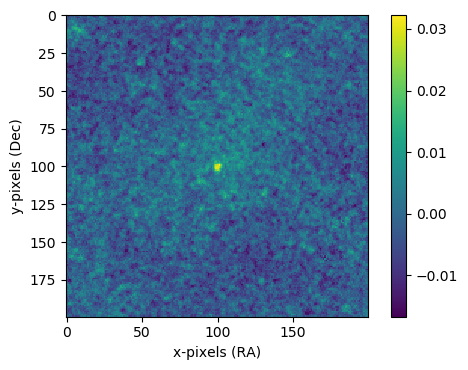

In [25]:
data = median_fits_data
ind = np.unravel_index(np.argmax(data, axis=None), data.shape)
print("Pulsar Detection at (RA,DEC):",ind)
# Plot the Average FITS File
plt.figure(dpi=100)    
plt.imshow(data.T, cmap=plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show()

### USING 7330 NOS OF FITS FILE FOR STACKING FORM FOLDER PULSAR_EXAMPLE_FITS_7330

In [ ]:
# List the Input FITS files and Call your function to get average of the FITS files
n = 7330 # no of image file to stack, max limit 7330
file2 = ['pulsar_example_fits_7330/{}.fits'.format(str(i).zfill(4)) for i in range(n)]
mean, std, left_bin, bins = median_bins_fits(file2,75)
median_fits_data = median_approx_fits(file2,75)

Pulsar Detection at (RA,DEC): (101, 99)


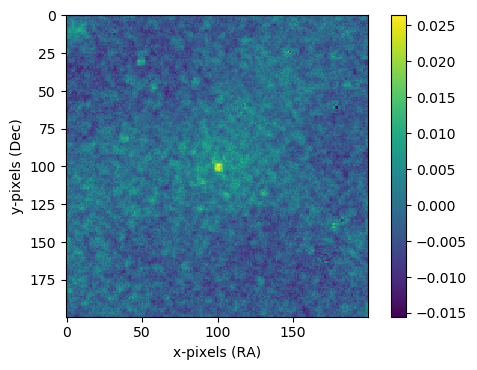

In [11]:
data = median_fits_data
ind = np.unravel_index(np.argmax(data, axis=None), data.shape)
print("Pulsar Detection at (RA,DEC):",ind)
# Plot the Average FITS File
plt.figure(dpi=100)    
plt.imshow(data.T, cmap=plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show()